In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib
from matplotlib import rcParams
import seaborn as sns
import pandas as pd
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles
import os
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Arial']
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_theme(style="ticks", rc=custom_params)

%matplotlib inline

In [2]:
os.chdir('/mnt/data/hong/2022/human_placenta/')

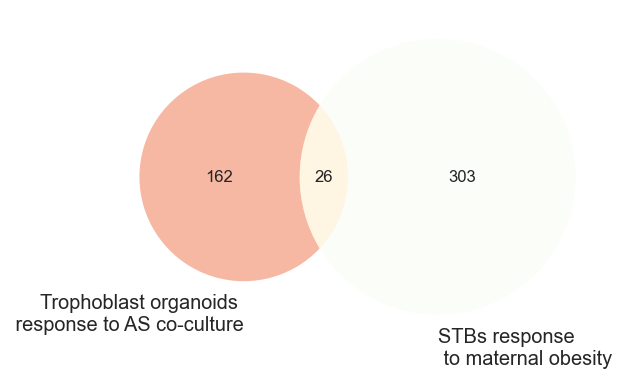

In [4]:
venn2(subsets = (188-26, 329-26, 26), set_labels = ('Trophoblast organoids \n response to AS co-culture', 'STBs response \n to maternal obesity'), set_colors=('#E94E1B', '#F7FCF0'))
plt.savefig('figures/enrichr/AS_STBs.pdf')

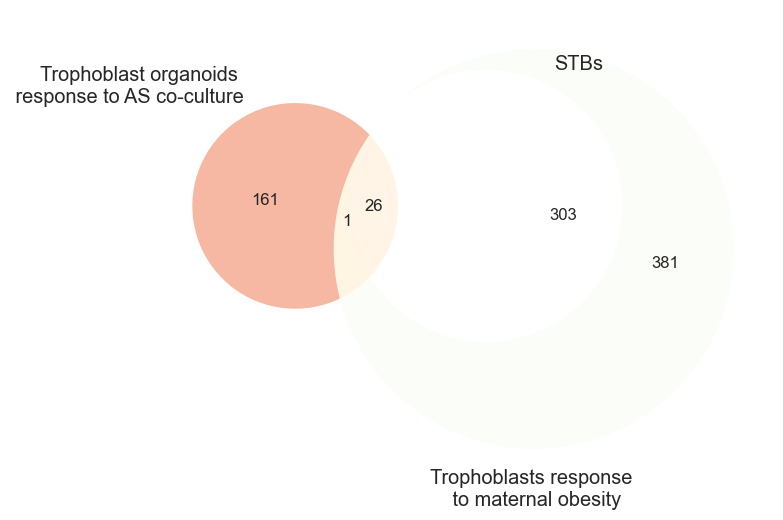

In [10]:
A = 161
B = 0
C = 381
# Calculate the intersections
AB = 0
AC = 1
BC = 303
ABC = 26
# Create the Venn diagram
venn_labels = {'100': A - AB - AC + ABC, '010': B - AB - BC + ABC, '001': C - AC - BC + ABC,
               '110': AB - ABC, '101': AC - ABC, '011': BC - ABC, '111': ABC}
plt.figure(figsize=(8, 8))
venn_diagram = venn3(subsets=(A, B, AB, C, AC, BC, ABC), set_labels=['Trophoblast organoids \n response to AS co-culture', 'STBs', 'Trophoblasts response \n to maternal obesity'], set_colors=('#E94E1B', '#DDF2D8', '#F7FCF0'))
plt.savefig("figures/genes/Trophoblast_TO.pdf")

In [ ]:

def function_sets(cell_types, mode):
    ## read in the data
    # ad_zscore = sc.pp.scale(ad_clean[ad_clean.obs.final_celltypes==cell_type], max_value=10, zero_center=True, layer = 'log_norm', copy = True)
    dfs = [pd.read_csv(f'output/DEGs/final_negbinom_all/score_tsv/{cell_type}.tsv', sep='\t') for cell_type in cell_types]
    ## order df by score
    df_sorts = [df.sort_values('score' , ascending=False, inplace=False) for df in dfs]
    common_sets = [set(df_sort.query("convergence=='high'&p<0.05")['Unnamed: 0']) for df_sort in df_sorts]
    divergent_sets = [set(df_sort.query("convergence=='low'&p<0.05")['Unnamed: 0']) for df_sort in df_sorts]
    if mode == 'common':
        sets = common_sets
    if mode == 'divergent':
        sets = divergent_sets
    elif mode=='both':
        sets = [set(df_sort.query("p<0.05")['Unnamed: 0']) for df_sort in df_sorts]
    A = len(sets[0])
    B = len(sets[1])
    C = len(sets[2])

# Calculate the intersections
    AB = len(sets[0] & sets[1])
    AC = len(sets[0] & sets[2])
    BC = len(sets[1] & sets[2])
    ABC = len(sets[0] & sets[1] & sets[2])

# Create the Venn diagram
    venn_labels = {'100': A - AB - AC + ABC, '010': B - AB - BC + ABC, '001': C - AC - BC + ABC,
               '110': AB - ABC, '101': AC - ABC, '011': BC - ABC, '111': ABC}
    plt.figure(figsize=(8, 8))
    venn_diagram = venn3(subsets=(A, B, AB, C, AC, BC, ABC), set_labels=cell_types, set_colors=('#FFBB78', '#98DF8A', '#FF9896'))
    plt.savefig(f"figures/genes/{'_'.join(cell_types)}_{mode}.pdf")

In [ ]:
from scipy.stats import fisher_exact
table = np.array([[6, 2], [1, 4]])

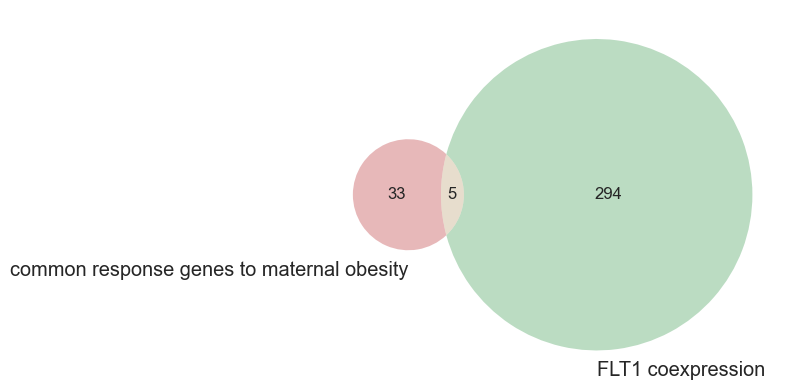

In [8]:
venn2(subsets = (33, 294, 5), set_labels = ('common response genes to maternal obesity', 'FLT1 coexpression'))
plt.savefig('figures/enrichr/VEC_FLT.pdf')

In [21]:

def function_sets(cell_types, mode):
    ## read in the data
    # ad_zscore = sc.pp.scale(ad_clean[ad_clean.obs.final_celltypes==cell_type], max_value=10, zero_center=True, layer = 'log_norm', copy = True)
    dfs = [pd.read_csv(f'output/DEGs/final_negbinom_all/score_tsv/{cell_type}.tsv', sep='\t') for cell_type in cell_types]
    ## order df by score
    df_sorts = [df.sort_values('score' , ascending=False, inplace=False) for df in dfs]
    common_sets = [set(df_sort.query("convergence=='high'&p<0.05")['Unnamed: 0']) for df_sort in df_sorts]
    divergent_sets = [set(df_sort.query("convergence=='low'&p<0.05")['Unnamed: 0']) for df_sort in df_sorts]
    if mode == 'common':
        sets = common_sets
    if mode == 'divergent':
        sets = divergent_sets
    elif mode=='both':
        sets = [set(df_sort.query("p<0.05")['Unnamed: 0']) for df_sort in df_sorts]
    A = len(sets[0])
    B = len(sets[1])
    C = len(sets[2])

# Calculate the intersections
    AB = len(sets[0] & sets[1])
    AC = len(sets[0] & sets[2])
    BC = len(sets[1] & sets[2])
    ABC = len(sets[0] & sets[1] & sets[2])

# Create the Venn diagram
    venn_labels = {'100': A - AB - AC + ABC, '010': B - AB - BC + ABC, '001': C - AC - BC + ABC,
               '110': AB - ABC, '101': AC - ABC, '011': BC - ABC, '111': ABC}
    plt.figure(figsize=(8, 8))
    venn_diagram = venn3(subsets=(A, B, AB, C, AC, BC, ABC), set_labels=cell_types, set_colors=('#FFBB78', '#98DF8A', '#FF9896'))
    plt.savefig(f"figures/genes/{'_'.join(cell_types)}_{mode}.pdf")

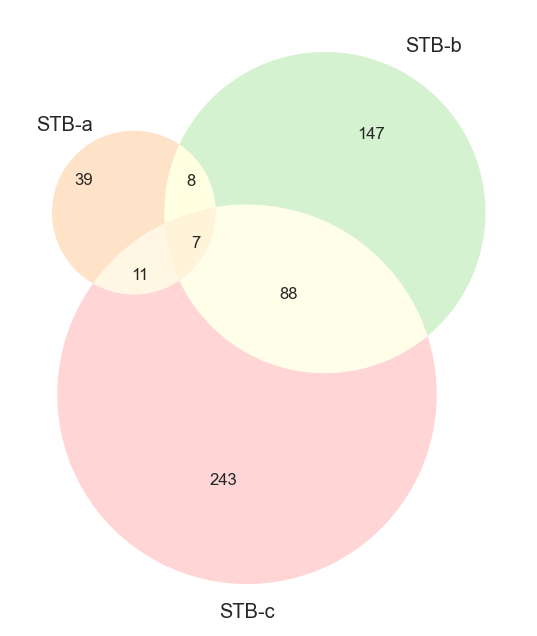

In [22]:
function_sets(['STB-a', 'STB-b', 'STB-c'], 'common')

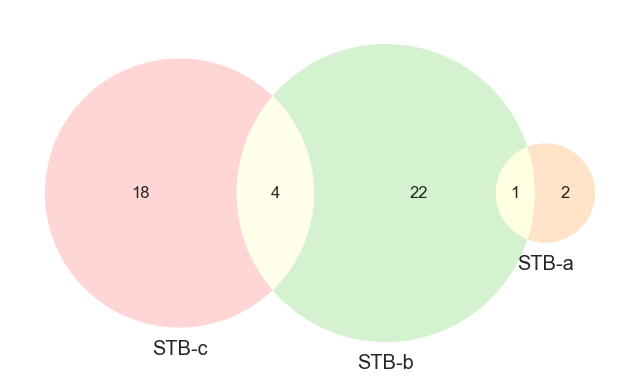

In [23]:
function_sets(['STB-a', 'STB-b', 'STB-c'], 'divergent')